# Discovering graph concepts

If we want a complete map of a graph, we basically need to know everything about its structure. But in practice, that raw data isn't easy for humans to understand. To make sense of a small graph, we can try visualizing it, but this won't work for large graphs. For massive graphs, only a mathematical representation can help us.

One better approach is to define graph structure using mathematical features. These features simplify the structure into numbers and vectors, reducing the complexity and making it easier for people to understand. In this way, graphs can be better understood and processed.

We said that the main goals of graph learning usually operate on three levels:

- Node-level prediction

- Edge-level prediction

- Graph-level prediction

So, features can be extracted at:

- Node level

- Edge level

- Graph level


## Node-level feature extraction

 At first glance, node classification may seem similar to standard supervised classification.
However, there is a significant difference between these two.

In standard supervised classification, it is assumed that the training samples are independent and identically distributed (i.i.d.).

This assumption allows the model to process each sample independently and ignore any dependencies between samples.

But in node classification within a graph, this assumption is violated.

Nodes in a graph are often connected, and their features and labels can influence their neighbors.
This dependency between nodes means that we cannot treat each node independently, but instead must model the structure and relationships between them during the learning process.

💡 Therefore, due to these dependencies, node classification is often treated as a semi-supervised learning problem.



## 📘 Degree in Undirected Graphs

### 🔹 Node Degree *i*: Number of edges adjacent to node *i*

Despite its simplicity, **degree** is one of the most useful and widely used metrics in graph analysis.

The degree of a node *i* is calculated as:

$$
k_i = \sum_{j=1}^{n} A_{ij}
$$

For example, in the figure below:

$$
k_A = 4
$$

The degree of node **A** is 4.

---

<p align="center">
  <img src="images/2.drawio.png" alt="Node Degree Illustration" width="500"/>
</p>

---

### 🧪 Examples:

#### (a)  
The central node has a **degree of 5**  
➡️ because it is connected to **5 distinct edges**.

#### (b)  
The central node has **5 neighbors**,  
➡️ but the **degree is 8** since it has **8 edge connections** (including loops and multi-edges).

---

> 💡 **Note**: Degree is a fundamental concept in graph theory that quantifies how connected each node is.


In [12]:
import numpy as np
import networkx as nx
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
G = nx.Graph()
G.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('B', 'D'),
('B', 'E'), ('C', 'F'), ('C', 'G')]
)

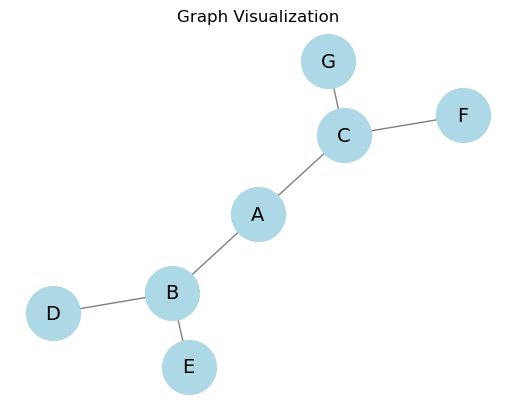

In [4]:
pos = nx.spring_layout(G, seed=0) 
nx.draw_networkx(G, pos, with_labels=True, node_color='lightblue', node_size=1500, font_size=14, edge_color='gray')

plt.axis("off")
plt.title("Graph Visualization")
plt.show()

In [6]:
print(f"deg(A) = {G.degree['A']}")

deg(A) = 2


## 📊 Average Degree in Undirected Graphs

### 🔸 Average Degree of Nodes:

The **average degree of nodes** in a graph can be considered as the **graph’s degree**:

$$
c = \frac{1}{n} \sum_{i=1}^{n} k_i
$$

### 🔸 Relationship Between Edges and Degrees:

In an undirected graph with **n nodes** and **m edges**,  
each edge has two endpoints, so in total there are **2m edge-ends**.

This means the sum of all node degrees equals \( 2m \):

$$
2m = \sum_{i=1}^{n} k_i = \sum_{ij} A_{ij}
$$

### 🔸 Combining the Two Equations:

By substituting the total sum into the average formula:

$$
c = \frac{2m}{n}
$$



## 🧮 Graph Density 

### 🔹 Definition of Graph Density (ρ)

Graph density is the **fraction of edges that actually exist** out of all possible edges in a simple undirected graph:

$$
\rho = \frac{m}{\binom{n}{2}} = \frac{2m}{n(n-1)}
$$


### 🔹 Total Number of Possible Edges in a Simple Graph

In a **simple undirected graph** (no loops, no multiple edges), the maximum number of possible edges is:

$$
\binom{n}{2} = \frac{1}{2} n(n-1)
$$

🧠 _For a complete graph (fully connected), the number of possible edges is exactly_ **\( \frac{n(n-1)}{2} \)**.


### 🔹 Average Degree and Density Relationship

Using the average degree \( c \), we can express density as:

$$
\rho = \frac{c}{n}
$$

Or from the relation:

$$
c = \frac{2m}{n}
$$


### 🔹 Interpretation

- The **density ρ** lies in the range:  
  $$
  0 \leq \rho \leq 1
  $$

- A **very small ρ** means the graph is **sparse**.

- A **very large ρ** means the graph is **dense** (possibly a **complete** or **highly connected** graph).

- ✅ If the graph is **very small**, it's likely **dense**.  
- 🚫 If the graph is **very large**, even with many edges, it may still be **sparse**.



## 🔁 In-Degree and Out-Degree in Directed Graphs

In a **directed graph**, the total number of edges \( m \) is equal to the total number of **incoming** edges (in-degree) across all nodes,  
and also equal to the total number of **outgoing** edges (out-degree):

$$
m = \sum_{i=1}^{n} k_i^{\text{in}} = \sum_{j=1}^{n} k_j^{\text{out}} = \sum_{ij} A_{ij}
$$



### 📊 Average In-Degree and Out-Degree

Thus, the **average in-degree** and **average out-degree** of a directed graph are equal:

$$
c_{\text{in}} = \frac{1}{n} \sum_{i=1}^{n} k_i^{\text{in}} = \frac{1}{n} \sum_{j=1}^{n} k_j^{\text{out}} = c_{\text{out}}
$$

Or simply:

$$
c_{\text{in}} = c_{\text{out}} = c = \frac{m}{n}
$$


> ℹ️ This equality holds for all directed graphs because each edge has one source and one destination, so each contributes exactly 1 to both in-degree and out-degree totals.



In [11]:
DG = nx.DiGraph()
DG.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'),
('B', 'E'), ('C', 'F'), ('C', 'G')])

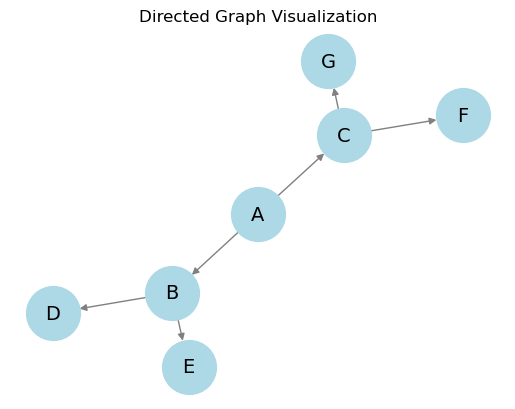

In [10]:
nx.draw_networkx(DG, pos, with_labels=True, node_color='lightblue', node_size=1500, font_size=14, edge_color='gray')

plt.axis("off")
plt.title("Directed Graph Visualization")
plt.show()

In [9]:
print(f"deg^-(A) = {DG.in_degree['A']}")
print(f"deg^+(A) = {DG.out_degree['A']}")

deg^-(A) = 0
deg^+(A) = 2


## 📈 Degree Distribution of a Graph

**Degree distribution** expresses how many nodes in a graph have different degrees \( k \).

Mathematically:

$$
P(k) = \frac{\text{Number of nodes with degree } k}{\text{Total number of nodes in the graph}}
$$

- \( P(k) \) indicates the **probability of observing a node with degree \( k \)** in the graph.


In [17]:
for nod, deg in G.degree():
    print(f"nod: {nod}, deg: {deg} ")

nod: A, deg: 2 
nod: B, deg: 3 
nod: C, deg: 3 
nod: D, deg: 1 
nod: E, deg: 1 
nod: F, deg: 1 
nod: G, deg: 1 


In [19]:
degrees = [deg for node, deg in G.degree()]
degree_counts = Counter(degrees)
print("Degree counts:", dict(degree_counts))

Degree counts: {2: 1, 3: 2, 1: 4}


In [22]:
total_nodes = G.number_of_nodes()
degree_distribution = {k: v / total_nodes for k, v in degree_counts.items()}

print("Degree distribution (P(k)):")
for degree, prob in sorted(degree_distribution.items()):
    print(f"P({degree}) = {prob:.3f}")

Degree distribution (P(k)):
P(1) = 0.571
P(2) = 0.143
P(3) = 0.286


# 📊 Graph Centrality Measures

Centrality quantifies the importance of a vertex or node in a network. It helps us to identify key nodes
in a graph based on their connectivity and influence on the flow of information or interactions within
the network. There are several measures of centrality, each providing a different perspective on the
importance of a node:

- **Degree centrality** is one of the simplest and most commonly used measures of centrality. It
is simply defined as the degree of the node. A high degree centrality indicates that a vertex is
highly connected to other vertices in the graph, and thus significantly influences the network.

- **Closeness centrality** measures how close a node is to all other nodes in the graph. It corresponds
to the average length of the shortest path between the target node and all other nodes in the
graph. A node with high closeness centrality can quickly reach all other vertices in the network.

- **Betweenness centrality** measures the number of times a node lies on the shortest path between
pairs of other nodes in the graph. A node with high betweenness centrality acts as a bottleneck
or bridge between different parts of the graph.

## 🚀 1. Degree Centrality

### 🔹 Definition
**Degree centrality** is the simplest centrality measure.  
It is simply the **number of edges connected to the node**.

**Formula:**
$$
DC(v) = \deg(v)
$$

- In **undirected graphs**, this is just the total number of edges connected to the node.
- In **directed graphs**, we have:
    - **In-degree**: number of incoming edges.
    - **Out-degree**: number of outgoing edges.

### 🔹 Interpretation
- Nodes with **high degree centrality** are directly connected to many other nodes.
- Examples:
    - In social networks: people with many direct friends.
    - In brain graphs: regions connected to many other regions.

---

## 🚀 2. Closeness Centrality

### 🔹 Definition
**Closeness centrality** measures **how close a node is to all other nodes** in the graph.  
It is defined as the inverse of the average length of the shortest paths to all other nodes.

**Formula:**
$$
CC(v) = \frac{1}{\sum_{u \neq v} d(v,u)}
$$

where $d(v,u)$ is the shortest path distance between nodes $v$ and $u$.

### 🔹 Interpretation
- A node with **high closeness centrality** can reach other nodes **quickly**.
- Examples:
    - In transportation networks: well-located hubs.
    - In brain networks: regions that efficiently communicate with the whole brain.

---

## 🚀 3. Betweenness Centrality

### 🔹 Definition
**Betweenness centrality** measures **how often a node lies on the shortest paths** between other pairs of nodes.

**Formula:**
$$
BC(v) = \sum_{s \neq v \neq t} \frac{\sigma_{st}(v)}{\sigma_{st}}
$$

where:
- $\sigma_{st}$ = number of shortest paths from node $s$ to node $t$
- $\sigma_{st}(v)$ = number of those paths that pass through $v$.

### 🔹 Interpretation
- Nodes with **high betweenness centrality** act as **bridges or brokers**.
- Examples:
    - In social networks: they control or facilitate information flow.
    - In brain networks: may coordinate communication between different subnetworks.



In [29]:
print(f"Degree centrality = {nx.degree_centrality(G)} \n ")
print(f"Closeness centrality = {nx.closeness_centrality(G)} \n ")
print(f"Betweenness centrality = {nx.betweenness_centrality(G)}")

Degree centrality = {'A': 0.3333333333333333, 'B': 0.5, 'C': 0.5, 'D': 0.16666666666666666, 'E': 0.16666666666666666, 'F': 0.16666666666666666, 'G': 0.16666666666666666} 
 
Closeness centrality = {'A': 0.6, 'B': 0.5454545454545454, 'C': 0.5454545454545454, 'D': 0.375, 'E': 0.375, 'F': 0.375, 'G': 0.375} 
 
Betweenness centrality = {'A': 0.6, 'B': 0.6, 'C': 0.6, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0}


## 📊 Node Importance in Graphs

The importance of nodes A, B, and C in a graph depends on the type of centrality used. Degree centrality considers nodes A and B to be more important because they have more neighbors than node C. However, when using closeness centrality, node C becomes the most important since it can reach any other node in the graph via the shortest possible path. On the other hand, nodes A, B, and C have equal betweenness centrality because they all lie on a large number of shortest paths between other nodes.

In addition to these traditional centrality measures, we will explore how to calculate the importance of a node using machine learning techniques in the next chapters. However, centralities are not the only metrics we will discuss. In fact, another crucial measure is the **density** of the graph, which indicates how connected the graph is overall. Density is defined as the ratio between the actual number of edges and the maximum possible number of edges that the graph could have.

A graph with high density is considered more connected and generally allows for more robust information flow compared to a graph with low density. The formula to calculate the maximum possible number of edges depends on whether the graph is directed or undirected. For an undirected graph with \( n \) nodes, the maximum possible number of edges is:

$$
\frac{n(n - 1)}{2}
$$

For a directed graph with \( n \) nodes, the maximum possible number of edges is simply:

$$
n(n - 1)
$$

Thus, the density of a graph is calculated as:

$$
\text{Density} = \frac{\text{Number of edges}}{\text{Maximum possible number of edges}}
$$

For example, if we consider the graph G, it has 6 edges, while the maximum possible number of edges with 7 nodes in an undirected graph would be:

$$
\frac{7(7 - 1)}{2} = 21
$$

Therefore, the density of this graph is:

$$
\frac{6}{21} \approx 0.2857
$$

This gives us an indication that the graph is relatively sparse and not fully connected.


___


## 🔁 Transitivity & Clustering in Graphs

### 🧠 The Concept of Transitivity

A very useful concept in graph analysis is **transitivity**.

It is based on this logical rule:

> If **A = B** and **B = C**, then **A = C**

Now, in graph terms, if two nodes are both connected to a third node, they may be connected to each other as well.

This is often summarized with the phrase:

> “A friend of my friend is also my friend”

In graph theory, this logic implies that if node **u** is connected to **v**, and **v** is connected to **w**, there might also be an edge between **u** and **w**, forming a **triangle**.

---

### 🔁 Closed and Open Paths of Length 2

- A **path of length two** means a path like **u → v → w**
- If **u** is also connected directly to **w**, it forms a **closed path** or **triangle**
- If **u** is not connected to **w**, the path is **open**

---

## 🔺 Clustering Coefficient

The **clustering coefficient** quantifies **how many of these paths of length 2 are actually closed**.

### 📐 Formula:

$$
C = \frac{\text{number of closed paths of length two}}{\text{number of all paths of length two}}
$$

---

### 🧮 Interpretation:

- **C = 1**: Every path of length 2 closes into a triangle. The graph is **fully clustered**.
- **C = 0**: No triangles exist in the graph. It’s **sparse** or **random**.
- **0 < C < 1**: The graph has **some clustering**, and the value shows **how likely it is** that a random pair of neighbors are also connected.

This coefficient gives a **single number** to express the **level of local connectedness** in a graph.

---

> 🔍 In practice, higher clustering coefficients are typical of social networks and community-like structures, while low clustering is common in random or tree-like graphs.



In [30]:
clustering_per_nod = nx.clustering(G)

print("Clustering coefficient per node: ")
for node, coeff in clustering_per_nod.items():
    print(f"{node}: {coeff:.3f}") 

Clustering coefficient per node: 
A: 0.000
B: 0.000
C: 0.000
D: 0.000
E: 0.000
F: 0.000
G: 0.000


In [31]:
avg_clustering = nx.average_clustering(G)

print(f" \nAverage Clustering Coefficient of Graph G is: {avg_clustering:.3f}")

 
Average Clustering Coefficient of Graph G is: 0.000


The average clustering coefficient of Graph G is 0.000, indicating there are no local clusters or triangles in the network.
This means that neighbors of nodes are not connected to each other, showing a completely unclustered structure.